In [51]:
from hrmpy import HRM
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [52]:
# Load CSV file
df = pd.read_csv('./Sample-HRM-p50-genotyping.csv')

/home/satrio/miniconda3/envs/api_devel/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



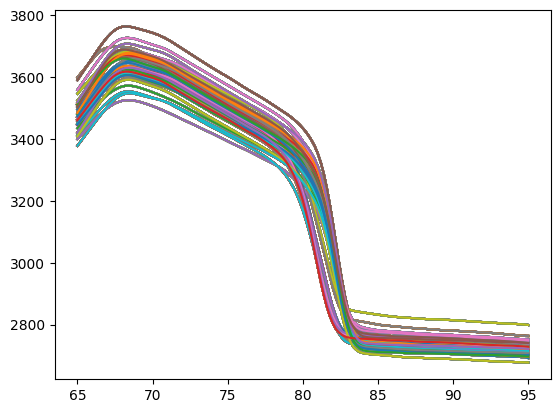

In [53]:
# Init HRM
hrm = HRM(df)

# Get temperature df
hrm.temp

# Get data df
hrm.data

data = hrm.data

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, hrm.data)

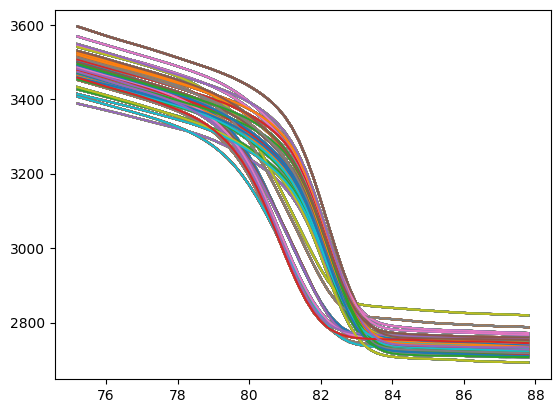

In [54]:
# Subset data
hrm.subset((75,88))
data = hrm.data

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, hrm.data)

In [55]:
# Get clustering for each column
hrm.cluster

# Change clustering settings, default is kmeans with n=2 (2 group)
hrm.clustering('dbscan', 3)
hrm.clustering('agglomerative', 3)
hrm.clustering('kmeans', 3)

palette = ['red', 'blue', 'green']

/home/satrio/miniconda3/envs/api_devel/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



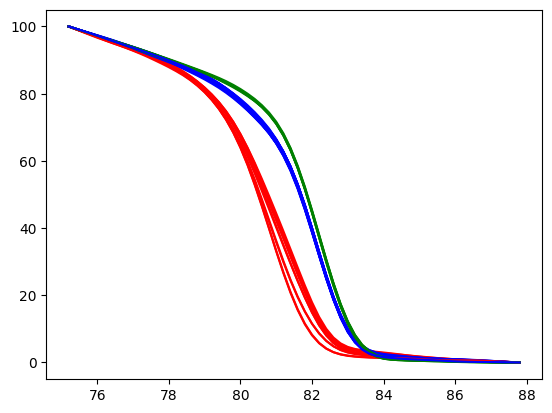

In [56]:
# Get normalised data
data = hrm.normal()

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

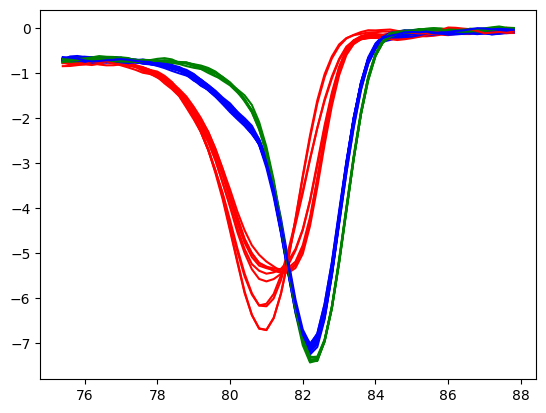

In [57]:
# Get delta or difference
data = hrm.diff()

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

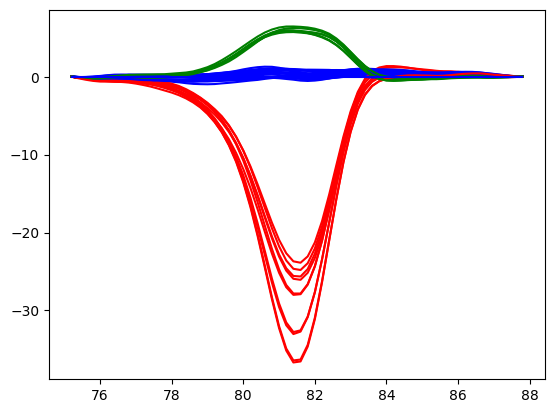

In [58]:
# Get substracted data against reference
data = hrm.sub('J14')

for i in range(len(data.columns)):
    column = data.columns[i]
    plt.plot(hrm.temp, data[column], color=palette[hrm.cluster[i]])

In [59]:
# Reshape data
reshape = hrm.reshape(hrm.sub('J14'))

# Create interactive plot
fig = px.line(reshape, x='Temperature', y='Intensity', line_group="Sample", title="HRM Interactive Figure", color='Cluster')
fig.show()